In [1]:
import random
import timeit
import matplotlib.pyplot as plt
import csv

import algos
import viz
import plot

from cluster import Cluster as Cluster

Loaded 3108 data points
Displaying 15 sequential clusters


In [2]:
def gen_random_clusters(num_clusters):
    clusters = []
    for i in range(num_clusters):
        x = 2 * random.random() - 1
        y = 2 * random.random() - 1
        clusters.append(Cluster(set(['0']), x, y, 1, 1))
        
    return clusters

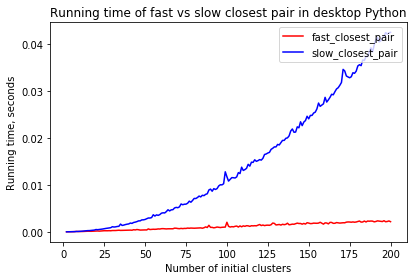

In [3]:
xs = range(2, 201)
ys_fast = []
ys_slow = []
for n in xs:
    clusters = gen_random_clusters(n)
    ys_fast.append(timeit.timeit(lambda: algos.fast_closest_pair(clusters), number=1))
    ys_slow.append(timeit.timeit(lambda: algos.slow_closest_pair(clusters), number=1))

plt.plot(xs, ys_fast, '-r', label='fast_closest_pair')
plt.plot(xs, ys_slow, '-b', label='slow_closest_pair')
plt.title('Running time of fast vs slow closest pair in desktop Python')
plt.xlabel('Number of initial clusters')
plt.ylabel('Running time, seconds')
plt.legend(loc='upper right')
plt.tight_layout()

Loaded 3108 data points
Displaying 15 clusters


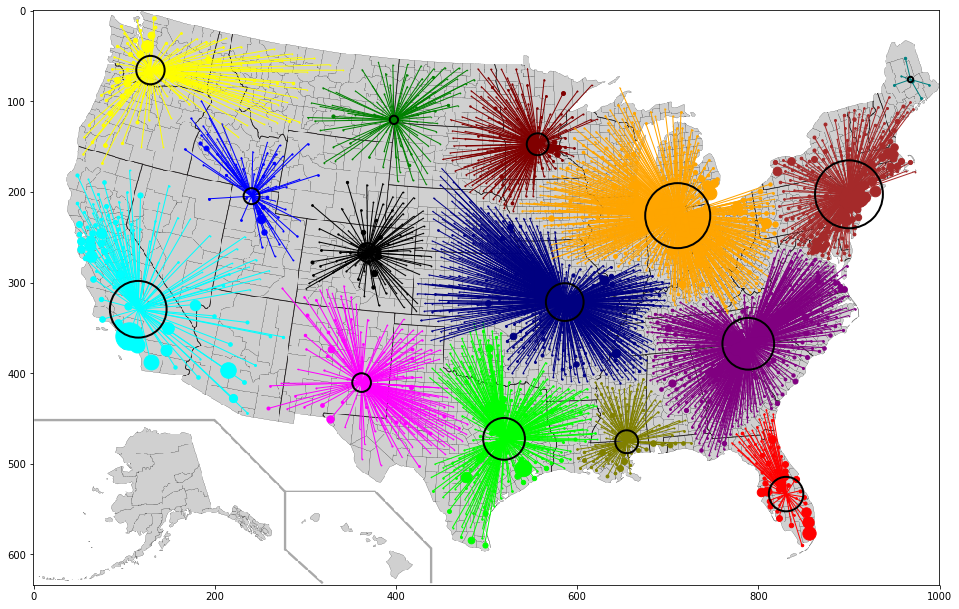

In [4]:
def visualize(datafile, algo):
    data_table = viz.load_data_table(datafile)
    clusters = [Cluster(set([x[0]]), x[1], x[2], x[3], x[4]) for x in data_table]
    clusters = algo(clusters)
    print("Displaying " + str(len(clusters)) + " clusters")
    plot.plot_clusters(data_table, clusters, True)
    return clusters
visualize(viz.DATA_3108_URL, lambda x: algos.hierarchical_clustering(x, 15))
plt.show()

Loaded 3108 data points
Displaying 15 clusters


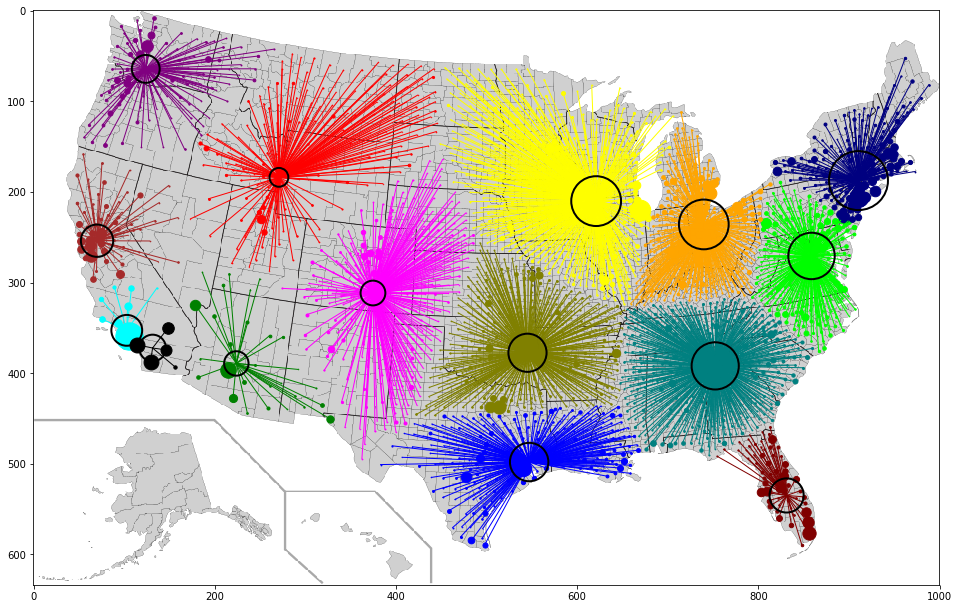

In [5]:
visualize(viz.DATA_3108_URL, lambda x: algos.kmeans_clustering(x, 15, 5))
plt.show()
# Suppose that we have n input clusters. Each call to the fast_closest_pair will cost roughly O(n*log(n)), 
# thus the time complexity for hierarchical clustering will be O(n²*log(n)). 
# On the other hand, if the number of output clusters is fixed to be a small number k,
# then the time complexity of k-means clustering will be O(n). 
# In conclusion: k-means is faster than hierarchical clustering.

Loaded 111 data points
Displaying 9 clusters


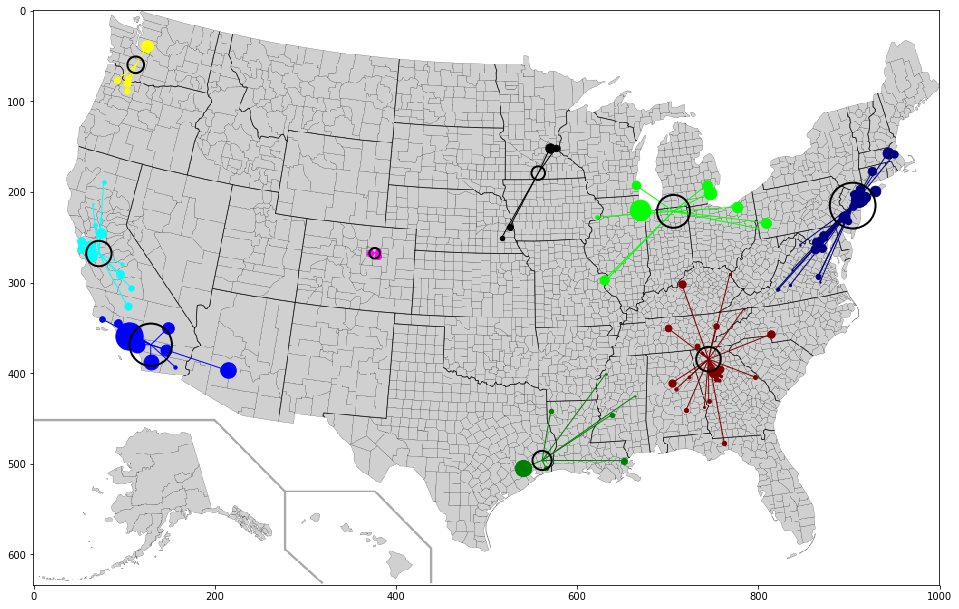

In [6]:
hierarchical_clusters = visualize(viz.DATA_111_URL, lambda x: algos.hierarchical_clustering(x, 9))

Loaded 111 data points
Displaying 9 clusters


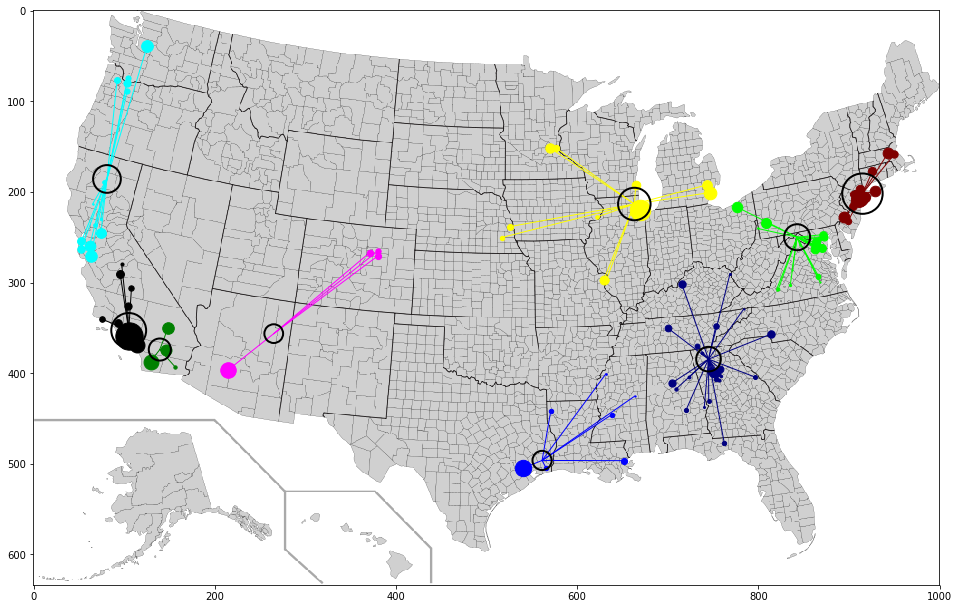

In [7]:
kmeans_clusters = visualize(viz.DATA_111_URL, lambda x: algos.kmeans_clustering(x, 9, 5))

In [8]:
# Distortion is a measurement of quality of different clusterings.
def distortion(clusters, data_table):
    return sum([cluster.cluster_error(data_table) for cluster in clusters])

In [9]:
# We can see each method output 3 clusters on the west coast of USA. 
# Whiile hierarchical clustering has one cluster in Washington state, 
# one in northern California and one in southern California, 
# k-means clustering generates one cluster covers Washington state and northern California at the same time.
# Thus the reason why k-means clustering has higher distortion
# is probably due to the fact that k-means initializes with 3 high-population counties in southern California.

# In conclusion, k-means requires more human supervision since its initialization
# could have a large influence on the final result.

In [10]:
data_table = viz.DATA_111_URL
dist_hierarchical = distortion(hierarchical_clusters, viz.load_data_table(data_table))
dist_kmeans = distortion(kmeans_clusters, viz.load_data_table(data_table))

Loaded 111 data points
Loaded 111 data points


In [11]:
print('Distortion for hierarchical clustering = %f (%s)' % (dist_hierarchical, dist_hierarchical))
print('Distortion for hierarchical clustering = %f (%s)' % (dist_kmeans, dist_kmeans))

Distortion for hierarchical clustering = 175163886915.830505 (175163886915.8305)
Distortion for hierarchical clustering = 271254226924.200470 (271254226924.20047)


In [12]:
def plot_dist(data_table, number_counties):
    xs = range(6, 21)
    data_table = viz.load_data_table(data_table)
    
    # Hierarchical clustering
    clusters = [Cluster(set([x[0]]), x[1], x[2], x[3], x[4]) for x in data_table]
    ys_hierarchical = []
    hierarchical_clusters = algos.hierarchical_clustering(clusters, 20)
    new_dist = distortion(hierarchical_clusters, data_table)
    ys_hierarchical.append(new_dist)
    for idx in range(19, 5, -1):
        hierarchical_clusters = algos.hierarchical_clustering(clusters, idx)
        new_dist = distortion(hierarchical_clusters, data_table)
        ys_hierarchical = [new_dist] + ys_hierarchical
        
    # K-means clustering
    clusters = [Cluster(set([x[0]]), x[1], x[2], x[3], x[4]) for x in data_table]
    ys_kmeans = []
    for idx in range(6, 21):
        kmeans_clusters = algos.kmeans_clustering(clusters, idx, 5)
        ys_kmeans.append(distortion(kmeans_clusters, data_table))

    plt.plot(xs, ys_hierarchical, '-r', label='hierarchical')
    plt.plot(xs, ys_kmeans, '-b', label='k-means')
    plt.title("Distortion for hierarchical and k-means clustering for " + str(number_counties) + " points")
    plt.xlabel('Number of output clusters')
    plt.ylabel('Distortion * 10^11')
    plt.legend(loc='upper right')
    plt.tight_layout()

In [13]:
data_table_111 = viz.DATA_111_URL
data_table_290 = viz.DATA_290_URL
data_table_896 = viz.DATA_896_URL

Loaded 111 data points


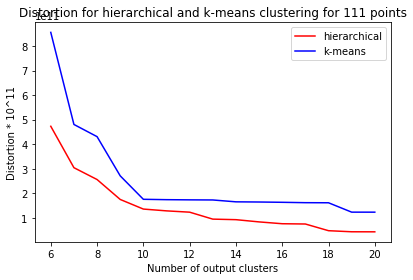

In [14]:
plot_dist(data_table_111, 111)

Loaded 290 data points


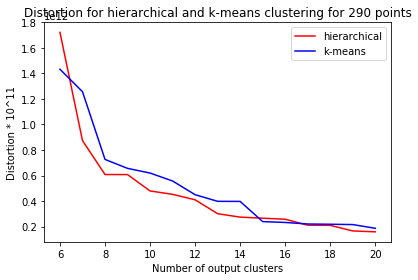

In [15]:
plot_dist(data_table_290, 290)

Loaded 896 data points


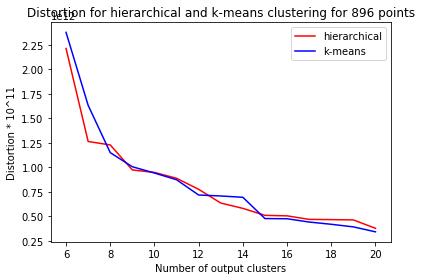

In [16]:
plot_dist(data_table_896, 896)